In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import csv
import itertools

In [8]:
%matplotlib inline

In [9]:
with open('id_all_property 2.csv') as f:
    reader = csv.reader(f)
    
    for row in itertools.islice(reader, 4):
        print(row)

['device_or_cookie_id', 'device_or_cookie_indicator', 'property_id', 'unique_days_seeing_property_on_device_or_cookie_id']
['id_558314', '1', 'property_66021', '7']
['id_558314', '1', 'property_24444', '1']
['id_558314', '1', 'property_285395', '6']


In [ ]:
with open('id_all_property 2.csv') as f:
    reader = csv.reader(f)
    csv_rows = [row for row in reader]

In [14]:
with open('id_all_ip 2.csv') as f:
    reader = csv.reader(f)
    
    for row in itertools.islice(reader, 4):
        print(row)

['device_or_cookie_id', 'device_or_cookie_indicator', 'ip', 'ip_freq_count', 'idxip_anonymous_c1', 'idxip_anonymous_c2', 'idxip_anonymous_c3', 'idxip_anonymous_c4', 'idxip_anonymous_c5']
['id_25644', '1', 'ip1750664', '18', '0', '1', '1', '0', '1']
['id_25644', '1', 'ip5400336', '38', '0', '6', '1', '0', '1']
['id_25644', '1', 'ip5572833', '8', '0', '8', '1', '0', '1']


In [15]:
with open('property_category_corrected.csv') as f:
    reader = csv.reader(f)
    
    for row in itertools.islice(reader, 4):
        print(row)

['property_id', 'category_id']
['property_40678', 'category_82']
['property_40678', 'category_210']
['property_40678', 'category_331']


In [17]:
dev_basic_train_df = pd.read_csv("dev_train_basic.csv")
dev_basic_test_df = pd.read_csv("dev_test_basic.csv")
cookie_all_basic_df = pd.read_csv("cookie_all_basic.csv")
ipagg_all_df = pd.read_csv("ipagg_all.csv")
property_category_df = pd.read_csv("property_category_corrected.csv")
id_all_ip_df = pd.read_csv("id_all_ip 2.csv")
id_all_property_df = pd.read_csv("id_all_property 2.csv")

##Pickle the DataFrames

In [157]:
dev_basic_train_df.to_pickle("device_training_df.pkl")

In [158]:
dev_basic_test_df.to_pickle("device_test_df.pkl")
cookie_all_basic_df.to_pickle("cookie_df.pkl")
ipagg_all_df.to_pickle("ipagg_df.pkl")
property_category_df.to_pickle("property_category_df.pkl")
id_all_ip_df.to_pickle("id_all_ip_df.pkl")
id_all_property_df.to_pickle("id_all_property_df.pkl")

OSError: [Errno 22] Invalid argument

#Training Data for Devices
The associated features are specific to devices.   
142k rows

In [18]:
dev_basic_train_df.head()

,drawbridge_handle,device_id,device_type,device_os,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,handle_292447,id_1000002,devtype_2,devos_138,country_146,1,anonymous_c1_331,anonymous_c2_23084,34,1,204
1,handle_1272807,id_1000061,devtype_2,devos_157,country_146,0,anonymous_c1_1350,anonymous_c2_3147,51,1,203
2,handle_1644226,id_1000068,devtype_2,devos_157,country_146,0,anonymous_c1_1166,anonymous_c2_11093,41,1,204
3,handle_1634852,id_1000149,devtype_4,devos_133,country_146,1,anonymous_c1_1260,anonymous_c2_2456,10,25,198
4,handle_1189159,id_1000202,devtype_4,devos_7,country_146,0,anonymous_c1_917,anonymous_c2_19317,5,1,204


In [29]:
dev_basic_train_df.shape

(142770, 11)

In [45]:
train_device_type_count = dev_basic_train_df['device_type'].value_counts()
train_device_type_count[:10]

devtype_4    72080
devtype_2    62586
devtype_5     4268
devtype_7     2383
devtype_6     1229
devtype_1      162
-1              50
devtype_3       12
dtype: int64

##Most devices are one of two types

In [47]:
train_device_proportions = train_device_type_count / 142770
train_device_proportions

devtype_4    0.504868
devtype_2    0.438369
devtype_5    0.029894
devtype_7    0.016691
devtype_6    0.008608
devtype_1    0.001135
-1           0.000350
devtype_3    0.000084
dtype: float64

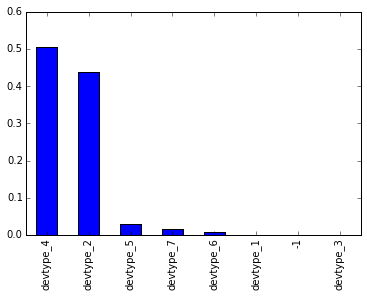

In [54]:
train_device_proportions.plot(kind = "bar")

##Most are from one country

In [95]:
train_country_proportion = dev_basic_train_df['country'].value_counts()/ 142770
train_country_proportion[:10]

country_146    0.910548
country_169    0.019479
country_201    0.018884
-1             0.018393
country_7      0.003859
country_197    0.002564
country_94     0.002529
country_24     0.002087
country_182    0.001534
country_4      0.001345
dtype: float64

##More distribution over OS

In [96]:
dev_os_counts_train_proportion = dev_basic_train_df['device_os'].value_counts() / 142770
dev_os_counts_train_proportion[:10]

devos_68     0.211389
devos_157    0.196330
devos_119    0.091889
devos_7      0.067689
devos_138    0.066709
devos_72     0.046200
devos_36     0.044106
devos_133    0.033768
devos_114    0.032164
devos_159    0.023100
dtype: float64

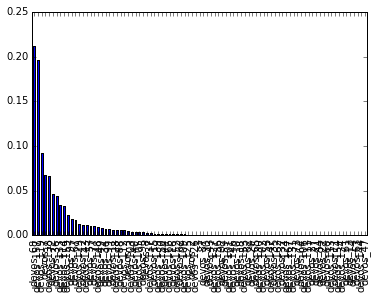

In [97]:
dev_os_counts_train_proportion.plot(kind="bar")

##Anonymous C0 is a boolean value of 0, 1 (or -1) if not known

In [99]:
train_anon_C0_count = dev_basic_train_df['anonymous_c0'].value_counts()
train_anon_C0_count[:10]

 0    51862
-1    50266
 1    40642
dtype: int64

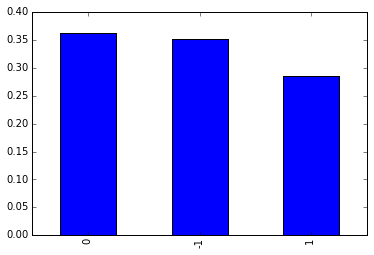

In [102]:
(train_anon_C0_count / 142770).plot(kind='bar')

Not sure why the below is here, have to check.

##Anonymous C1 and C2 are categorical values

In [103]:
train_anon_C1_count = dev_basic_train_df['anonymous_c1'].value_counts()
train_anon_C1_count[:10]

-1                   28971
anonymous_c1_255      6802
anonymous_c1_1307     4705
anonymous_c1_614      3745
anonymous_c1_1311     3007
anonymous_c1_331      2796
anonymous_c1_60       2208
anonymous_c1_1089     2130
anonymous_c1_204      2109
anonymous_c1_1179     1919
dtype: int64

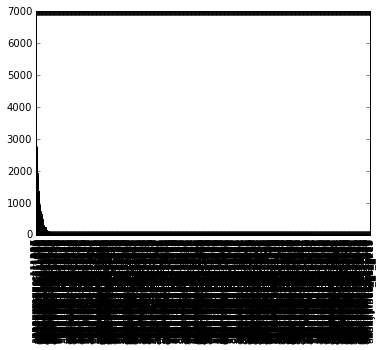

In [105]:
train_anon_C1_count[1:].plot(kind="bar")

In [111]:
train_anon_C1_count[1:].describe()

count    1420.000000
mean       80.140141
std       306.510869
min        21.000000
25%        38.000000
50%        43.000000
75%        48.000000
max      6802.000000
dtype: float64

##Not much data for anon C2

In [112]:
train_anon_C2_count = dev_basic_train_df['anonymous_c2'].value_counts()
train_anon_C2_count[:10]

-1                    47881
anonymous_c2_836         71
anonymous_c2_23245       66
anonymous_c2_1392        53
anonymous_c2_5775        52
anonymous_c2_13281       52
anonymous_c2_21769       49
anonymous_c2_28230       49
anonymous_c2_21587       48
anonymous_c2_28886       48
dtype: int64

##Anonymous 5, Anonymous 6, Anonymous 7 are integer values

In [113]:
train_anon_5_count = dev_basic_train_df['anonymous_5'].value_counts()
train_anon_5_count[:10]

1     9461
2     8509
52    7386
3     7309
4     6459
5     5780
6     5192
7     4705
8     4335
9     3978
dtype: int64

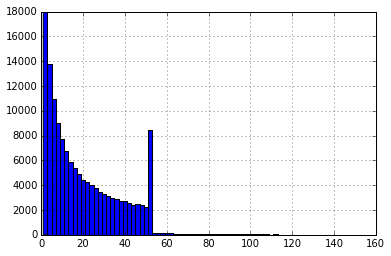

In [118]:
dev_basic_train_df['anonymous_5'].hist(bins=75)

In [119]:
dev_basic_train_df['anonymous_5'].describe()

count    142770.000000
mean         19.795727
std          17.578637
min           1.000000
25%           5.000000
50%          14.000000
75%          31.000000
max         151.000000
Name: anonymous_5, dtype: float64

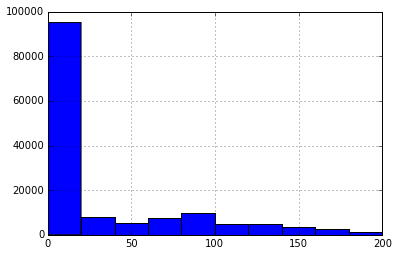

In [123]:
dev_basic_train_df['anonymous_6'].hist(bins=10)

In [125]:
dev_basic_train_df['anonymous_6'].describe()

count    142770.000000
mean         30.930497
std          48.322029
min           0.000000
25%           1.000000
50%           1.000000
75%          53.000000
max         200.000000
Name: anonymous_6, dtype: float64

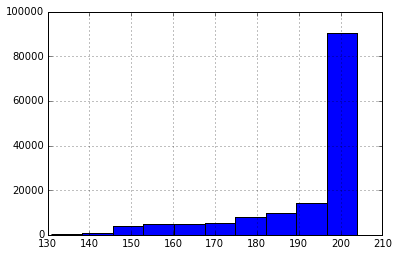

In [126]:
dev_basic_train_df['anonymous_7'].hist(bins=10)

In [128]:
dev_basic_train_df['anonymous_7'].describe()

count    142770.000000
mean        193.190537
std          15.525353
min         131.000000
25%         188.000000
50%         201.000000
75%         204.000000
max         204.000000
Name: anonymous_7, dtype: float64

In [25]:
id_all_property_df.head()

,device_or_cookie_id,device_or_cookie_indicator,property_id,unique_days_seeing_property_on_device_or_cookie_id
0,id_558314,1,property_66021,7
1,id_558314,1,property_24444,1
2,id_558314,1,property_285395,6
3,id_558314,1,property_267459,1
4,id_558314,1,property_197052,14


#Testing Data for Devices
61k rows

In [20]:
dev_basic_test_df.head()

,drawbridge_handle,device_id,device_type,device_os,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,-1,id_1,devtype_2,devos_72,country_146,1,-1,-1,52,1,204
1,-1,id_100002,devtype_4,devos_7,country_146,1,anonymous_c1_322,anonymous_c2_3059,7,1,149
2,-1,id_1000035,devtype_4,devos_68,country_146,-1,anonymous_c1_814,anonymous_c2_1918,17,106,201
3,-1,id_1000099,devtype_2,devos_159,country_146,0,anonymous_c1_736,-1,19,1,203
4,-1,id_1000294,devtype_4,devos_119,country_146,-1,anonymous_c1_261,anonymous_c2_17508,19,147,204


In [36]:
dev_basic_test_df.shape

(61156, 11)

In [39]:
country_counts = dev_basic_test_df['country'].value_counts()
country_counts[:10]

country_146    55621
country_169     1183
country_201     1148
-1              1134
country_7        247
country_197      159
country_94       151
country_24       139
country_38        98
country_182       84
dtype: int64

In [41]:
dev_os_counts = dev_basic_test_df['device_os'].value_counts()
dev_os_counts[:10]

devos_68     12915
devos_157    12106
devos_119     5540
devos_7       4125
devos_138     4111
devos_72      2862
devos_36      2710
devos_133     2031
devos_114     1936
devos_159     1420
dtype: int64

In [43]:
device_type_counts = dev_basic_test_df['device_type'].value_counts()
device_type_counts[:10]

devtype_4    30642
devtype_2    26928
devtype_5     1899
devtype_7     1036
devtype_6      575
devtype_1       48
-1              24
devtype_3        4
dtype: int64

In [51]:
test_device_type_proportion = device_type_counts / 61156
test_device_type_proportion[:10]

devtype_4    0.501047
devtype_2    0.440317
devtype_5    0.031052
devtype_7    0.016940
devtype_6    0.009402
devtype_1    0.000785
-1           0.000392
devtype_3    0.000065
dtype: float64

#Training and Testing Set for Cookies
Training set has drawbridge handle to link to devices.  
The other features are specific to cookies.  
2.2M rows

In [21]:
cookie_all_basic_df.head()

,drawbridge_handle,cookie_id,computer_os_type,computer_browser_version,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,-1,id_10,computer_os_type_203,computer_browser_version_1158,country_146,1,anonymous_c1_1307,anonymous_c2_18778,15,1,204
1,handle_609762,id_100,computer_os_type_133,computer_browser_version_875,country_146,1,anonymous_c1_753,-1,41,1,204
2,handle_1622320,id_1000,computer_os_type_203,computer_browser_version_36,country_146,0,anonymous_c1_906,anonymous_c2_751,40,140,204
3,-1,id_10000,computer_os_type_203,computer_browser_version_36,country_146,1,anonymous_c1_255,anonymous_c2_2725,34,140,204
4,handle_1286628,id_100000,computer_os_type_203,computer_browser_version_875,country_146,0,anonymous_c1_255,anonymous_c2_235,52,134,204


In [31]:
cookie_all_basic_df.shape

(2175520, 11)

##Split out the Training Set, where handle is not -1

In [134]:
cookie_training_set_df = cookie_all_basic_df[cookie_all_basic_df['drawbridge_handle'] != '-1']

In [135]:
cookie_training_set_df.shape

(1643821, 11)

In [136]:
cookie_training_set_df.head()

,drawbridge_handle,cookie_id,computer_os_type,computer_browser_version,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
1,handle_609762,id_100,computer_os_type_133,computer_browser_version_875,country_146,1,anonymous_c1_753,-1,41,1,204
2,handle_1622320,id_1000,computer_os_type_203,computer_browser_version_36,country_146,0,anonymous_c1_906,anonymous_c2_751,40,140,204
4,handle_1286628,id_100000,computer_os_type_203,computer_browser_version_875,country_146,0,anonymous_c1_255,anonymous_c2_235,52,134,204
6,handle_226230,id_1000006,computer_os_type_203,computer_browser_version_1238,-1,1,-1,-1,1,183,183
8,handle_15216,id_1000008,computer_os_type_200,computer_browser_version_482,country_146,0,anonymous_c1_1179,anonymous_c2_2683,40,74,204


In [137]:
unique_drawbridge_handles = cookie_training_set_df['drawbridge_handle'].value_counts()
unique_drawbridge_handles[:10]

handle_1188763    28
handle_1069237    25
handle_60057      23
handle_1501282    23
handle_968119     23
handle_1458731    22
handle_96674      21
handle_170493     21
handle_844159     21
handle_1595183    20
dtype: int64

##Most handles are associated with 1 or 2 cookies but some are associated with many more

In [141]:
unique_drawbridge_handles.describe()

count    1555794.000000
mean           1.056580
std            0.326336
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max           28.000000
dtype: float64

##Anonymous C0 is a boolean value of 0, 1 (or -1) if not known

In [142]:
train_anon_C0_count_cookie = cookie_training_set_df['anonymous_c0'].value_counts()
train_anon_C0_count_cookie[:10]

 0    1015294
 1     386312
-1     242215
dtype: int64

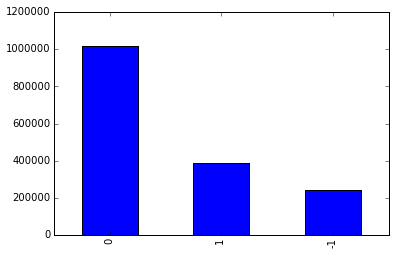

In [143]:
train_anon_C0_count_cookie.plot(kind="bar")

##Anonymous C1 and C2 are categorical values


In [144]:
train_anon_C1_count_cookie = cookie_training_set_df['anonymous_c1'].value_counts()
train_anon_C1_count_cookie[:10]

-1                   451483
anonymous_c1_255      64423
anonymous_c1_1307     38988
anonymous_c1_1311     31480
anonymous_c1_614      30718
anonymous_c1_331      21632
anonymous_c1_204      20586
anonymous_c1_1089     18564
anonymous_c1_60       18553
anonymous_c1_1179     18550
dtype: int64

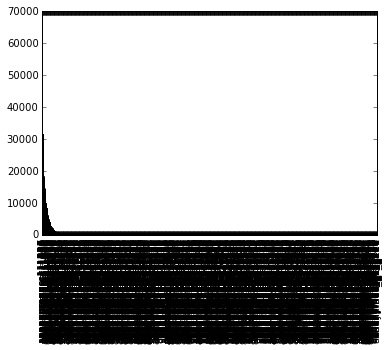

In [145]:
train_anon_C1_count_cookie[1:].plot(kind="bar")

##Again, there is not much data for the category C2

In [146]:
train_anon_C2_count_cookie = cookie_training_set_df['anonymous_c2'].value_counts()
train_anon_C2_count_cookie[:10]

-1                    681568
anonymous_c2_836        1408
anonymous_c2_130         549
anonymous_c2_23245       492
anonymous_c2_3574        447
anonymous_c2_20406       417
anonymous_c2_1392        395
anonymous_c2_4165        391
anonymous_c2_13616       388
anonymous_c2_4794        384
dtype: int64

##Anonymous 5

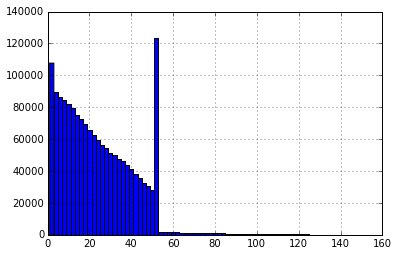

In [147]:
cookie_training_set_df['anonymous_5'].hist(bins=75)

In [149]:
cookie_training_set_df['anonymous_5'].describe()

count    1643821.000000
mean          23.975651
std           17.437592
min            1.000000
25%           10.000000
50%           21.000000
75%           36.000000
max          151.000000
Name: anonymous_5, dtype: float64

##Anonymous 6

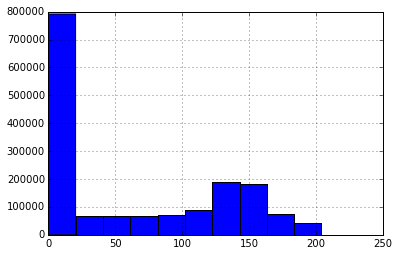

In [152]:
cookie_training_set_df['anonymous_6'].hist(bins=10)

In [150]:
cookie_training_set_df['anonymous_6'].describe()

count    1643821.000000
mean          62.751028
std           67.069044
min            0.000000
25%            1.000000
50%           32.000000
75%          139.000000
max          204.000000
Name: anonymous_6, dtype: float64

##Anonymous 7

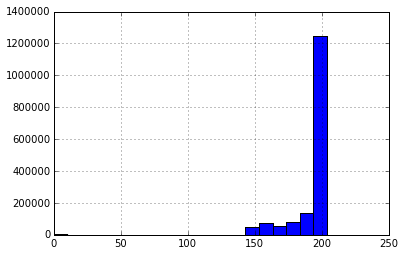

In [154]:
cookie_training_set_df['anonymous_7'].hist(bins=20)

In [155]:
cookie_training_set_df['anonymous_7'].describe()

count    1643821.000000
mean         195.439671
std           15.119494
min            0.000000
25%          194.000000
50%          203.000000
75%          204.000000
max          204.000000
Name: anonymous_7, dtype: float64

#IP Address that devices/cookies have visited
Along with frequency and some usage metrics.  
34M rows

In [26]:
id_all_ip_df.head()

,device_or_cookie_id,device_or_cookie_indicator,ip,ip_freq_count,idxip_anonymous_c1,idxip_anonymous_c2,idxip_anonymous_c3,idxip_anonymous_c4,idxip_anonymous_c5
0,id_25644,1,ip1750664,18,0,1,1,0,1
1,id_25644,1,ip5400336,38,0,6,1,0,1
2,id_25644,1,ip5572833,8,0,8,1,0,1
3,id_25644,1,ip599211,24,0,24,1,0,1
4,id_25644,1,ip8273121,21,0,0,1,0,0


In [55]:
id_all_ip_df.shape

(34176619, 9)

#First divide data into Device or Cookie type

##Look at Cookie type first

In [64]:
cookie_id_all_ip_df = id_all_ip_df[id_all_ip_df['device_or_cookie_indicator'] == 1]

In [65]:
cookie_id_all_ip_df.shape

(31249705, 9)

##Lets see how many IPs the different cookies have used.

In [73]:
ip_by_cookie_counts = cookie_id_all_ip_df['device_or_cookie_id'].value_counts()

In [89]:
ip_by_cookie_counts.head()

id_2184938    1429
id_225060     1340
id_2749692    1308
id_683471     1230
id_4599775    1162
dtype: int64

##Most use between 2 and 13 ip addresses, but some use way more.

In [129]:
ip_by_cookie_counts.describe()

count    2175520.000000
mean          14.364246
std           34.295543
min            1.000000
25%            2.000000
50%            5.000000
75%           13.000000
max         1429.000000
dtype: float64

In [75]:
ip_by_cookie_counts.tail()

id_1339399    1
id_1289563    1
id_3751937    1
id_2812111    1
id_968655     1
dtype: int64

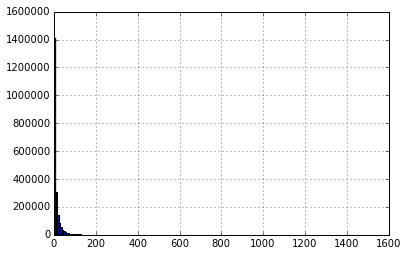

In [90]:
ip_by_cookie_counts.hist(bins=200)

##Look at Devices next

In [66]:
device_id_all_ip_df = id_all_ip_df[id_all_ip_df['device_or_cookie_indicator'] == 0]

In [67]:
device_id_all_ip_df.shape

(2926914, 9)

In [71]:
ip_by_device_counts = device_id_all_ip_df['device_or_cookie_id'].value_counts()

In [72]:
ip_by_device_counts.head(10)

id_2722401    794
id_4515976    642
id_1457770    620
id_3267775    533
id_1816804    521
id_2348513    516
id_4447328    499
id_4411748    464
id_2999953    435
id_4468076    416
dtype: int64

##Most use between 3 and 17 IPs, but some use a lot more.

In [130]:
ip_by_device_counts.describe()

count    214726.000000
mean         13.630925
std          19.105262
min           1.000000
25%           3.000000
50%           7.000000
75%          17.000000
max         794.000000
dtype: float64

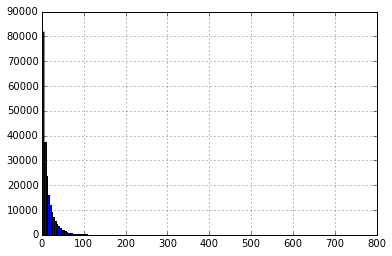

In [92]:
ip_by_device_counts.hist(bins=200)

In [156]:
ip_by_device_df.head()

,device_or_cookie_id,device_or_cookie_indicator,ip,ip_freq_count,idxip_anonymous_c1,idxip_anonymous_c2,idxip_anonymous_c3,idxip_anonymous_c4,idxip_anonymous_c5
31249705,id_4676078,0,ip4110970,87,0,87,1,0,1
31249706,id_4676078,0,ip20364193,73,73,6,2,3,1
31249707,id_4676078,0,ip8232100,223,223,177,1,1,1
31249708,id_4676078,0,ip1078323,4,0,4,1,0,1
31249709,id_4676078,0,ip14290649,1,1,1,1,1,1
31249710,id_2453662,0,ip8318203,1,0,1,1,0,1
31249711,id_2453662,0,ip10992210,1,1,1,1,1,1
31249712,id_2453662,0,ip3014945,2,2,2,2,2,2
31249713,id_2453662,0,ip14978679,6,0,6,1,0,1
31249714,id_2453662,0,ip1664385,1,1,1,1,1,1


#Info About Each IP address
11M rows

In [22]:
ipagg_all_df.head()

,ip_address,is_cellular_ip,ip_total_freq,ip_anonymous_c0,ip_anonymous_c1,ip_anonymous_c2
0,ip8352948,0,400000,52,5500,27
1,ip4596125,0,802,31,19,10
2,ip19351956,0,400000,52,3726,155
3,ip17464771,0,6577,47,20,17
4,ip14710657,0,5714,52,41,17


In [33]:
ipagg_all_df.shape

(11037814, 6)

#Device/Cookie visits to Web Properties
Including metric on days visited.  
119M rows !!!

In [27]:
id_all_property_df.head()

,device_or_cookie_id,device_or_cookie_indicator,property_id,unique_days_seeing_property_on_device_or_cookie_id
0,id_558314,1,property_66021,7
1,id_558314,1,property_24444,1
2,id_558314,1,property_285395,6
3,id_558314,1,property_267459,1
4,id_558314,1,property_197052,14


In [34]:
id_all_property_df.shape

(119484365, 4)

#Web properties described by category
1.9M rows

In [23]:
property_category_df.head()

,property_id,category_id
0,property_40678,category_82
1,property_40678,category_210
2,property_40678,category_331
3,property_40678,category_279
4,property_40678,category_164


In [35]:
property_category_df.shape

(1910952, 2)